 Author:Renaldo Sauveur
 
 Date:09/30/2024

***Introduction***

The following aims to perform multiple linear regression to model the relationship between air temperature and other selected variables.

Data from the meteorological station LVEG in Dominican Republic is considered to model the relationship between air temperature and other meteorological variables.

Features in the dataset are:

- Datetime

- Air Temperature

- Air Pressure

- Relative Humidity

- Wind Direction

- Wind Speed

- Rain

- Hail

- Samples/Hour

Python module scikit-learn for machine learning will be used.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions 
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
colnames = ["DateTime"," Air Pressure"," Air Temperature"," Relative Humidity"," Wind Direction"," Wind Speed"," Rain"," Hail"," Samples/hour"]

In [3]:
MetLVEG= pd.read_csv("LVEG-met.txt", sep=None , engine='python',skiprows=1, names=colnames)


***Exploratory data analysis***



In [4]:
MetLVEG

,DateTime,Air Pressure,Air Temperature,Relative Humidity,Wind Direction,Wind Speed,Rain,Hail,Samples/hour
0,2014-04-29T15:00:00Z,1002.7446,30.1605,51.6605,113.1240,2.3832,0.0,0.0,238
1,2014-04-29T16:00:00Z,1002.3891,31.3176,46.4328,101.4872,2.5429,0.0,0.0,119
2,2014-04-29T18:00:00Z,1000.4281,32.9009,38.7124,111.2212,2.3959,0.0,0.0,218
3,2014-04-29T19:00:00Z,1000.1225,32.1204,42.7463,111.6176,1.6546,0.0,0.0,240
4,2014-04-29T20:00:00Z,999.8550,32.1142,47.8067,128.0679,1.6008,0.0,0.0,240
...,...,...,...,...,...,...,...,...,...
89442,2024-08-06T19:00:00Z,1000.3475,34.4450,47.4558,48.7827,2.2925,0.0,0.0,120
89443,2024-08-06T20:00:00Z,999.8192,34.4583,45.9633,55.0995,2.0467,0.0,0.0,120
89444,2024-08-06T21:00:00Z,1000.1350,33.4700,50.0733,50.9084,2.0833,0.0,0.0,120
89445,2024-08-06T22:00:00Z,1000.5792,31.8950,58.2783,54.2986,1.7183,0.0,0.0,120


In [5]:
MetLVEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89447 entries, 0 to 89446
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            89447 non-null  object 
 1    Air Pressure       89447 non-null  float64
 2    Air Temperature    89447 non-null  float64
 3    Relative Humidity  89447 non-null  float64
 4    Wind Direction     89447 non-null  object 
 5    Wind Speed         89447 non-null  object 
 6    Rain               89447 non-null  float64
 7    Hail               89447 non-null  float64
 8    Samples/hour       89447 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 6.1+ MB


In [6]:
# converting each value 
# of column to a float
MetLVEG[" Air Pressure"] = pd.to_numeric(MetLVEG[" Air Pressure"], errors='coerce')
MetLVEG[" Air Temperature"] = pd.to_numeric(MetLVEG[" Air Temperature"], errors='coerce')
MetLVEG[" Relative Humidity"] = pd.to_numeric(MetLVEG[" Relative Humidity"], errors='coerce')
MetLVEG[" Wind Direction"] = pd.to_numeric(MetLVEG[" Wind Direction"], errors='coerce')
MetLVEG[" Wind Speed"] = pd.to_numeric(MetLVEG[" Wind Speed"], errors='coerce')
# We change the DateTime object column format in datetime format
MetLVEG['DateTime'] = pd.to_datetime(MetLVEG['DateTime'])

In [7]:
MetLVEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89447 entries, 0 to 89446
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   DateTime            89447 non-null  datetime64[ns, UTC]
 1    Air Pressure       89447 non-null  float64            
 2    Air Temperature    89447 non-null  float64            
 3    Relative Humidity  89447 non-null  float64            
 4    Wind Direction     89445 non-null  float64            
 5    Wind Speed         89445 non-null  float64            
 6    Rain               89447 non-null  float64            
 7    Hail               89447 non-null  float64            
 8    Samples/hour       89447 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 6.1 MB


In [8]:
MetLVEG.shape

(89447, 9)

Dealing with missing values

In [9]:
MetLVEG.isna().sum()

DateTime              0
 Air Pressure         0
 Air Temperature      0
 Relative Humidity    0
 Wind Direction       2
 Wind Speed           2
 Rain                 0
 Hail                 0
 Samples/hour         0
dtype: int64

In [10]:
MetLVEG9 = MetLVEG.dropna()

In [11]:
MetLVEG9

,DateTime,Air Pressure,Air Temperature,Relative Humidity,Wind Direction,Wind Speed,Rain,Hail,Samples/hour
0,2014-04-29 15:00:00+00:00,1002.7446,30.1605,51.6605,113.1240,2.3832,0.0,0.0,238
1,2014-04-29 16:00:00+00:00,1002.3891,31.3176,46.4328,101.4872,2.5429,0.0,0.0,119
2,2014-04-29 18:00:00+00:00,1000.4281,32.9009,38.7124,111.2212,2.3959,0.0,0.0,218
3,2014-04-29 19:00:00+00:00,1000.1225,32.1204,42.7463,111.6176,1.6546,0.0,0.0,240
4,2014-04-29 20:00:00+00:00,999.8550,32.1142,47.8067,128.0679,1.6008,0.0,0.0,240
...,...,...,...,...,...,...,...,...,...
89442,2024-08-06 19:00:00+00:00,1000.3475,34.4450,47.4558,48.7827,2.2925,0.0,0.0,120
89443,2024-08-06 20:00:00+00:00,999.8192,34.4583,45.9633,55.0995,2.0467,0.0,0.0,120
89444,2024-08-06 21:00:00+00:00,1000.1350,33.4700,50.0733,50.9084,2.0833,0.0,0.0,120
89445,2024-08-06 22:00:00+00:00,1000.5792,31.8950,58.2783,54.2986,1.7183,0.0,0.0,120


Dealing with duplicates values

In [12]:
MetLVEG9.drop_duplicates()

,DateTime,Air Pressure,Air Temperature,Relative Humidity,Wind Direction,Wind Speed,Rain,Hail,Samples/hour
0,2014-04-29 15:00:00+00:00,1002.7446,30.1605,51.6605,113.1240,2.3832,0.0,0.0,238
1,2014-04-29 16:00:00+00:00,1002.3891,31.3176,46.4328,101.4872,2.5429,0.0,0.0,119
2,2014-04-29 18:00:00+00:00,1000.4281,32.9009,38.7124,111.2212,2.3959,0.0,0.0,218
3,2014-04-29 19:00:00+00:00,1000.1225,32.1204,42.7463,111.6176,1.6546,0.0,0.0,240
4,2014-04-29 20:00:00+00:00,999.8550,32.1142,47.8067,128.0679,1.6008,0.0,0.0,240
...,...,...,...,...,...,...,...,...,...
89442,2024-08-06 19:00:00+00:00,1000.3475,34.4450,47.4558,48.7827,2.2925,0.0,0.0,120
89443,2024-08-06 20:00:00+00:00,999.8192,34.4583,45.9633,55.0995,2.0467,0.0,0.0,120
89444,2024-08-06 21:00:00+00:00,1000.1350,33.4700,50.0733,50.9084,2.0833,0.0,0.0,120
89445,2024-08-06 22:00:00+00:00,1000.5792,31.8950,58.2783,54.2986,1.7183,0.0,0.0,120


In [13]:
MetLVEG9.describe()

,Air Pressure,Air Temperature,Relative Humidity,Wind Direction,Wind Speed,Rain,Hail,Samples/hour
count,89445.000000,89445.000000,89445.000000,89445.000000,89445.000000,89445.000000,89445.000000,89445.000000
mean,1002.992767,26.595910,66.859237,160.389330,1.168094,1.354984,0.000002,172.589558
std,2.563552,3.518372,14.070910,82.360079,0.667064,12.094425,0.000473,59.618454
min,989.036700,16.957500,23.961700,0.012000,0.216700,0.000000,0.000000,2.000000
25%,1001.401700,23.938300,55.383300,110.589000,0.607100,0.000000,0.000000,120.000000
50%,1003.125000,26.081700,69.866700,125.095500,0.958300,0.000000,0.000000,120.000000
75%,1004.725800,29.150000,78.579600,209.341100,1.650600,0.000000,0.000000,240.000000
max,1012.286200,36.995000,94.723700,359.980200,4.972500,649.900000,0.100000,240.000000


In [14]:
MetLVEG9.columns

Index(['DateTime', ' Air Pressure', ' Air Temperature', ' Relative Humidity',
       ' Wind Direction', ' Wind Speed', ' Rain', ' Hail', ' Samples/hour'],
      dtype='object')

We will omit the following variables for our analysis : Rain, Hail and Samples/hour

In [15]:
# We drop the variables Rain, Hail and Samples/hour 
meteo_LVEG = MetLVEG9.drop([' Rain', ' Hail', ' Samples/hour'], axis=1)

In [16]:
meteo_LVEG

,DateTime,Air Pressure,Air Temperature,Relative Humidity,Wind Direction,Wind Speed
0,2014-04-29 15:00:00+00:00,1002.7446,30.1605,51.6605,113.1240,2.3832
1,2014-04-29 16:00:00+00:00,1002.3891,31.3176,46.4328,101.4872,2.5429
2,2014-04-29 18:00:00+00:00,1000.4281,32.9009,38.7124,111.2212,2.3959
3,2014-04-29 19:00:00+00:00,1000.1225,32.1204,42.7463,111.6176,1.6546
4,2014-04-29 20:00:00+00:00,999.8550,32.1142,47.8067,128.0679,1.6008
...,...,...,...,...,...,...
89442,2024-08-06 19:00:00+00:00,1000.3475,34.4450,47.4558,48.7827,2.2925
89443,2024-08-06 20:00:00+00:00,999.8192,34.4583,45.9633,55.0995,2.0467
89444,2024-08-06 21:00:00+00:00,1000.1350,33.4700,50.0733,50.9084,2.0833
89445,2024-08-06 22:00:00+00:00,1000.5792,31.8950,58.2783,54.2986,1.7183


In [17]:
# We made column name correction
meteo_LVEG.rename(columns={' Air Pressure':'Air_pressure', ' Air Temperature':'Air_Temperature', ' Relative Humidity':'Relative_Humidity', ' Wind Direction':'Wind_Direction', ' Wind Speed':'Wind_Speed'},inplace=True)

In [18]:
meteo_LVEG

,DateTime,Air_pressure,Air_Temperature,Relative_Humidity,Wind_Direction,Wind_Speed
0,2014-04-29 15:00:00+00:00,1002.7446,30.1605,51.6605,113.1240,2.3832
1,2014-04-29 16:00:00+00:00,1002.3891,31.3176,46.4328,101.4872,2.5429
2,2014-04-29 18:00:00+00:00,1000.4281,32.9009,38.7124,111.2212,2.3959
3,2014-04-29 19:00:00+00:00,1000.1225,32.1204,42.7463,111.6176,1.6546
4,2014-04-29 20:00:00+00:00,999.8550,32.1142,47.8067,128.0679,1.6008
...,...,...,...,...,...,...
89442,2024-08-06 19:00:00+00:00,1000.3475,34.4450,47.4558,48.7827,2.2925
89443,2024-08-06 20:00:00+00:00,999.8192,34.4583,45.9633,55.0995,2.0467
89444,2024-08-06 21:00:00+00:00,1000.1350,33.4700,50.0733,50.9084,2.0833
89445,2024-08-06 22:00:00+00:00,1000.5792,31.8950,58.2783,54.2986,1.7183


In [19]:
meteo_LVEG['Air_pressure']

0        1002.7446
1        1002.3891
2        1000.4281
3        1000.1225
4         999.8550
           ...    
89442    1000.3475
89443     999.8192
89444    1000.1350
89445    1000.5792
89446    1001.4392
Name: Air_pressure, Length: 89445, dtype: float64

Dealing with outliers



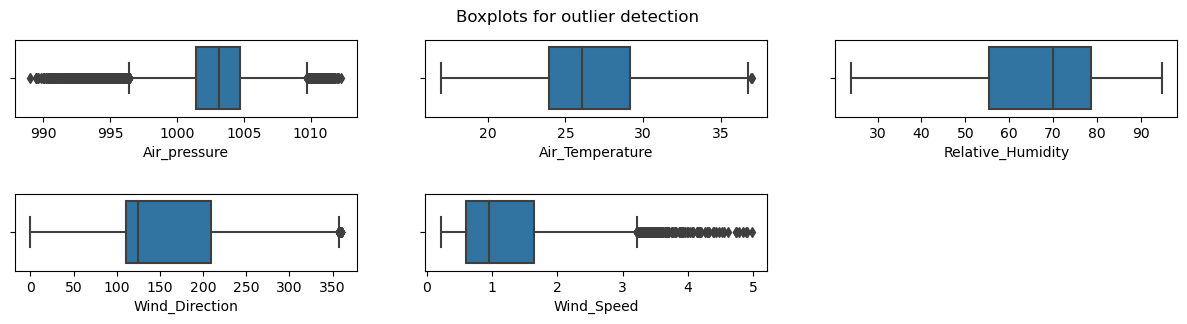

In [20]:
# We visualize each numeric variable in the dataset using a boxplot to detect the outliers.
#The outliers are the dots on the boxplots.

fig, axes = plt.subplots(2, 3, figsize=(15, 3))
fig.delaxes(axes[1][2])
plt.subplots_adjust(hspace=1)
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=meteo_LVEG['Air_pressure'])
sns.boxplot(ax=axes[0,1], x=meteo_LVEG['Air_Temperature'])
sns.boxplot(ax=axes[0,2], x=meteo_LVEG['Relative_Humidity'])
sns.boxplot(ax=axes[1,0], x=meteo_LVEG['Wind_Direction'])
sns.boxplot(ax=axes[1,1], x=meteo_LVEG['Wind_Speed'])
plt.show();




<AxesSubplot: xlabel='Air_pressure', ylabel='Count'>

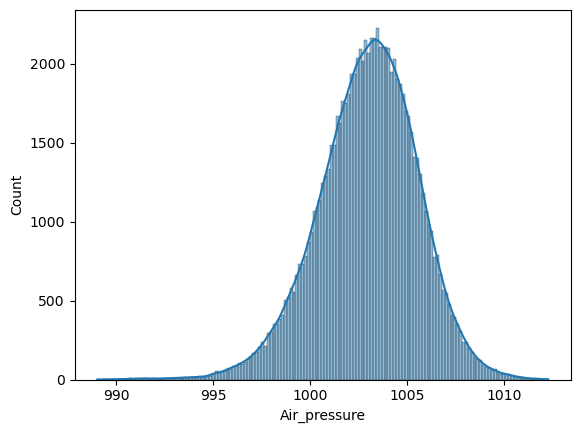

In [21]:
sns.histplot(meteo_LVEG['Air_pressure'], kde = True)

<AxesSubplot: xlabel='Air_Temperature', ylabel='Count'>

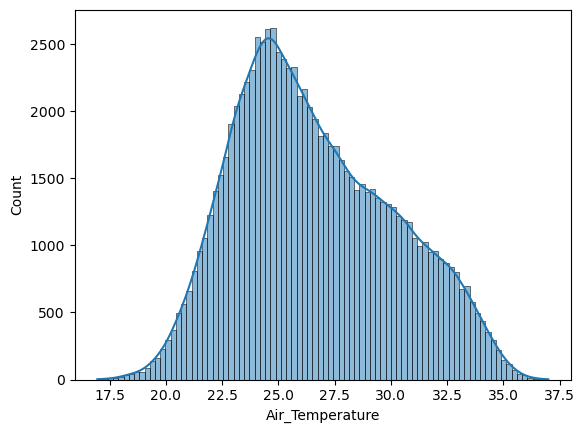

In [22]:
sns.histplot(meteo_LVEG['Air_Temperature'], kde = True)

<AxesSubplot: xlabel='Relative_Humidity', ylabel='Count'>

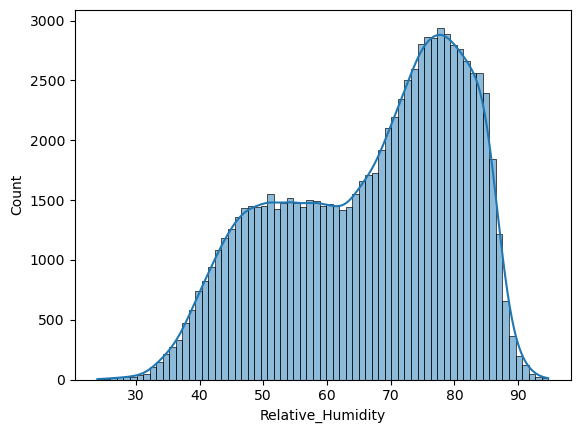

In [23]:
sns.histplot(meteo_LVEG['Relative_Humidity'], kde = True)

<AxesSubplot: xlabel='Wind_Direction', ylabel='Count'>

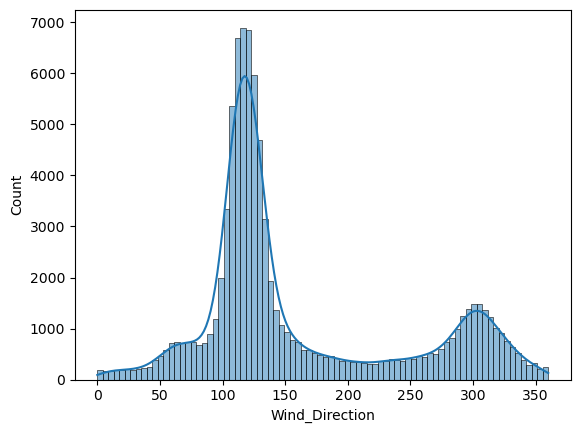

In [24]:
sns.histplot(meteo_LVEG['Wind_Direction'], kde = True)

<AxesSubplot: xlabel='Wind_Speed', ylabel='Count'>

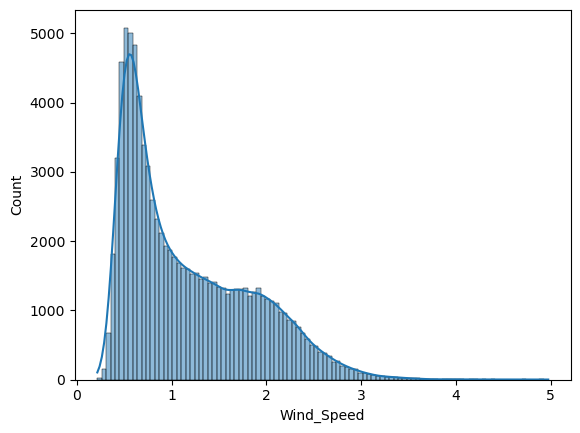

In [25]:
sns.histplot(meteo_LVEG['Wind_Speed'], kde = True)

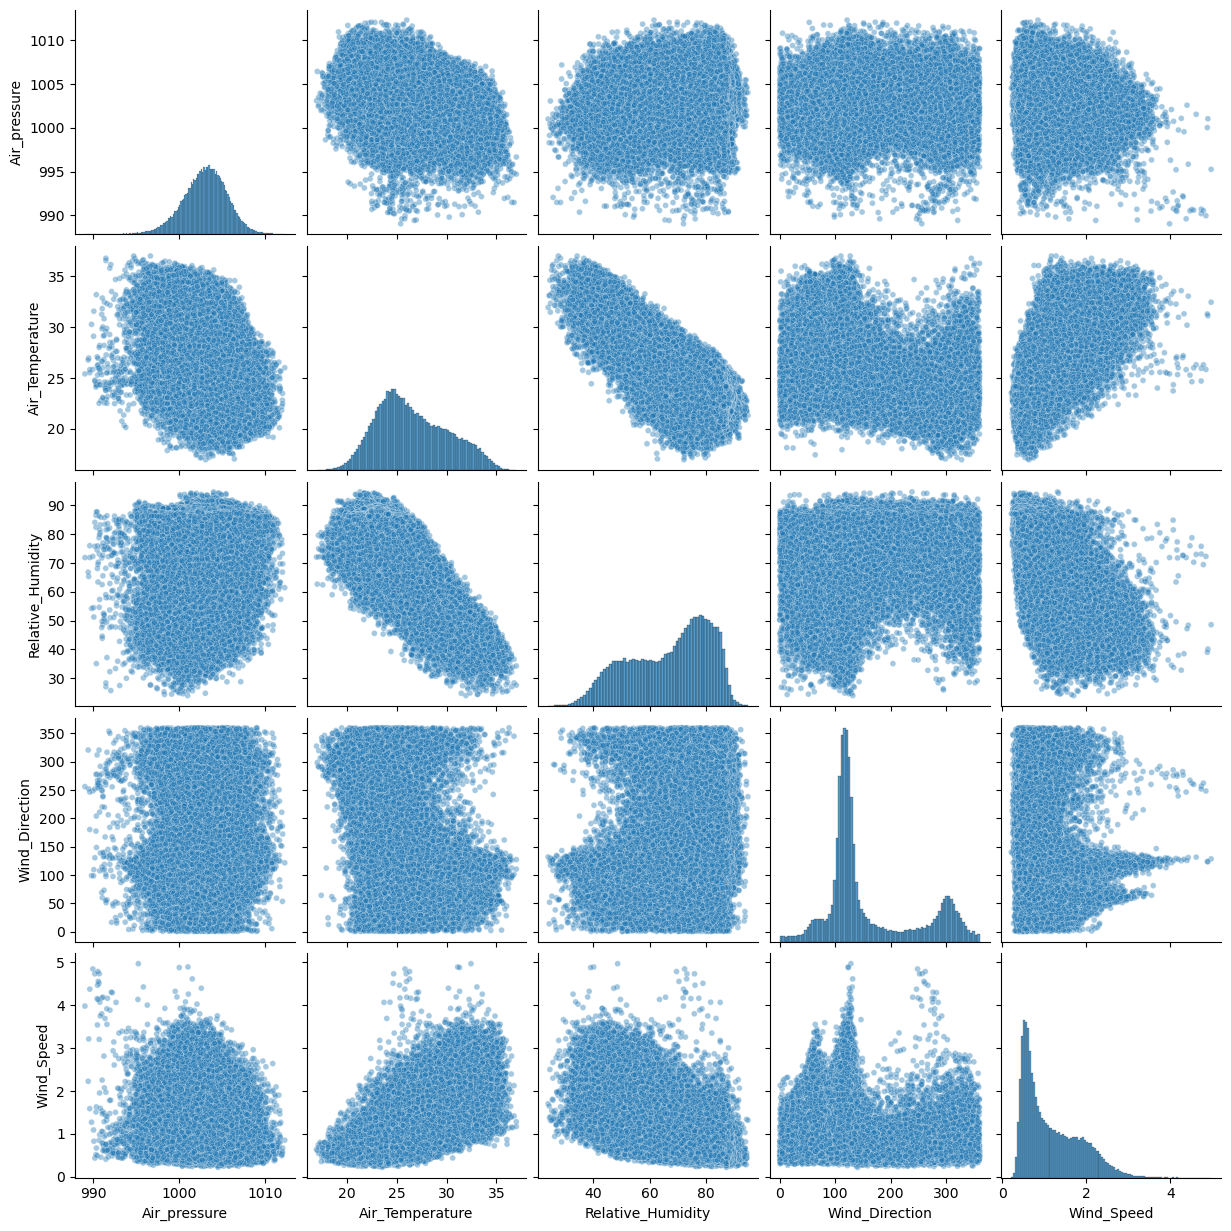

In [26]:
# We create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(meteo_LVEG[['Air_pressure', 'Air_Temperature', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']],    
             plot_kws={'alpha':0.4, 'size':5},   
            );

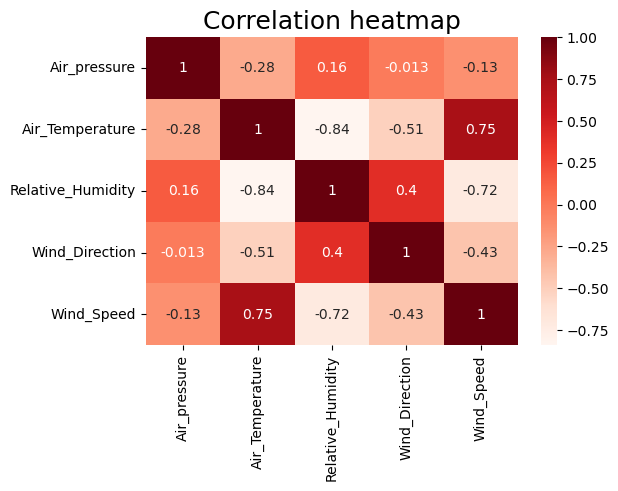

In [27]:
# We create correlation heatmap of the data

plt.figure(figsize=(6,4))
sns.heatmap(meteo_LVEG[['Air_pressure', 'Air_Temperature', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']].corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

 =============================================================
 =============================================================

***Simple Linear Regression of Air Temperature versus Relative Humidity***

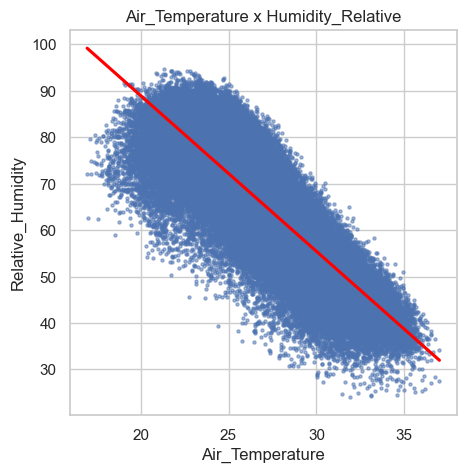

In [28]:
# Create a scatter plot of pression_LVEG and pression_testo, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=meteo_LVEG['Air_Temperature'], y=meteo_LVEG['Relative_Humidity'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.title('Air_Temperature x Humidity_Relative')
plt.show()

The linearity assumption holds for Air temperature, as there is a clear linear relationship in the scatterplot between Air temperature and Relative humidity. 

In [29]:
# correlation between column 1 and column2
print(meteo_LVEG['Air_Temperature'].corr(meteo_LVEG['Relative_Humidity']))

-0.8388077561864546


In [30]:
X = meteo_LVEG[['Relative_Humidity']]
y = meteo_LVEG[['Air_Temperature']]

In [31]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-1.9741211 ]
 [-0.90085161]
 [ 0.64865543]
 ...
 [-2.69174856]
 [-0.29622606]
 [-0.35992282]]


In [33]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# Evaluation of the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7027691070430033
R^2: 0.7027691070430033
MAE: 1.5314813785346362
MSE: 3.669249483786682
RMSE: 1.9155285129140422


In [35]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [36]:
# Evaluation of the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7068482638401934
R^2: 0.7068482638401934
MAE: 1.5345301608053707
MSE: 3.6687575030387483
RMSE: 1.9154000895475463


Coefficient of determination suggests that 70% of the Air Temperature is predicted by the Relative humidity.



In [37]:
# Results dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
83013,26.1717,24.653380,1.518320
6329,25.7342,25.770297,-0.036097
18929,29.6354,28.607858,1.027542
59023,30.4733,30.439035,0.034265
35209,24.1475,25.147511,-1.000011


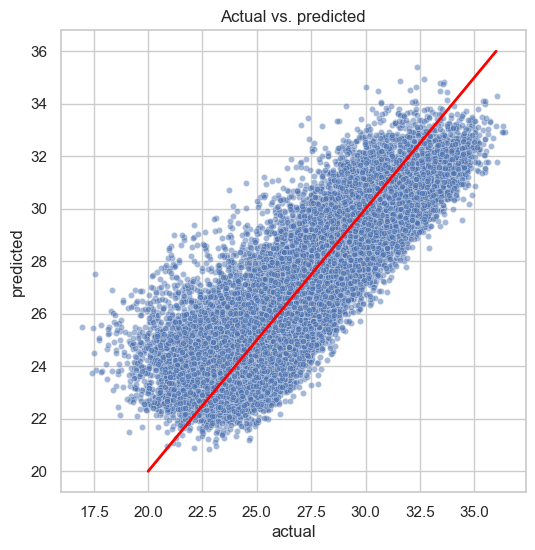

In [38]:
# Scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,36], [20,36], c='red', linewidth=2)
plt.title('Actual vs. predicted');

A perfect fit model generates predictions that have exact value to the actuals.The actual-predicted plot from this model will lie on the 45-degree line.

The plot of our model follows the trend of a 45-degree line. However, our model is not optimal; many points are far from that 45-degree line.

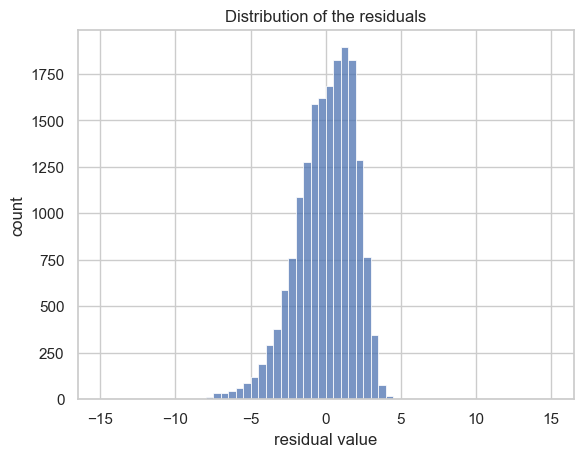

In [39]:
# Visualize the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

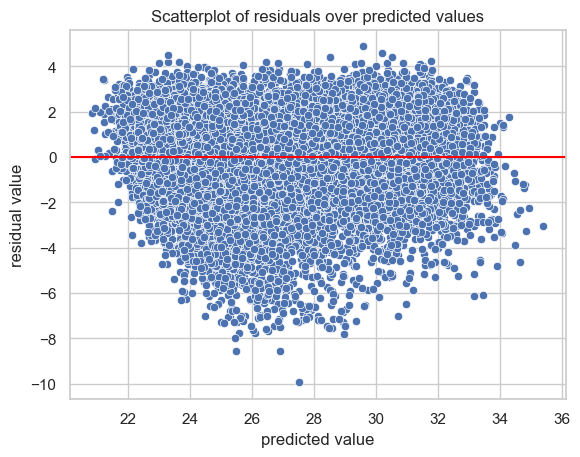

In [40]:
# Create a scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption.

In [41]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients.Relative_Humidity[0]

-2.9454250690658093

In [42]:
# 1. Calculate SD of mean_distance in X_train data
print(X_train['Relative_Humidity'].std())

# 2. Divide the model coefficient by the standard deviation
print(coefficients.Relative_Humidity[0] / X_train['Relative_Humidity'].std())

14.07773695137335
-0.20922574979485387


In [43]:
coefficients.Relative_Humidity[0]

-2.9454250690658093

 =============================================================
 =============================================================

***MULTILINEAR REGRESSION***

In [44]:
X = meteo_LVEG[['Air_pressure', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]
y = meteo_LVEG[['Air_Temperature']]

In [45]:
# Splitting of training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# Standardization of the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-1.53743051 -1.9741211  -0.72424738  1.55537492]
 [-0.71912649 -0.90085161 -0.5006455   1.56408426]
 [-0.8889551   0.64865543  1.98453523 -0.4630894 ]
 ...
 [-0.51106991 -2.69174856 -0.42618601  1.37893573]
 [ 0.53827413 -0.29622606 -0.53877254  0.67062624]
 [ 0.05021618 -0.35992282 -0.48754066  0.2814089 ]]


In [47]:
# Model fitting to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
# Evaluation of the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7967151871871193
R^2: 0.7967151871871193
MAE: 1.269260576264692
MSE: 2.5095059502554853
RMSE: 1.5841420233853671


In [49]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [50]:
# Evaluation of the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7991561138339752
R^2: 0.7991561138339752
MAE: 1.2718133274020014
MSE: 2.513536245643737
RMSE: 1.5854135881982774


Coefficient of determination suggests that 79% of the dependent variable is predicted by the independent variables.

In [51]:
# Results dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
83013,26.1717,24.778636,1.393064
6329,25.7342,25.444886,0.289314
18929,29.6354,29.717082,-0.081682
59023,30.4733,31.693967,-1.220667
35209,24.1475,24.906925,-0.759425


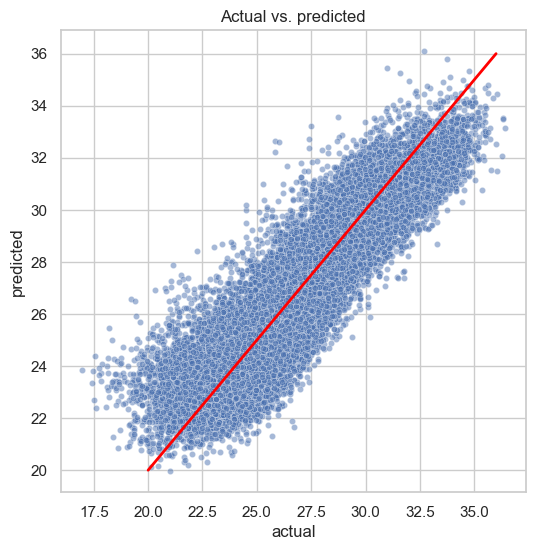

In [52]:
# Scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,36], [20,36], c='red', linewidth=2)
plt.title('Actual vs. predicted');

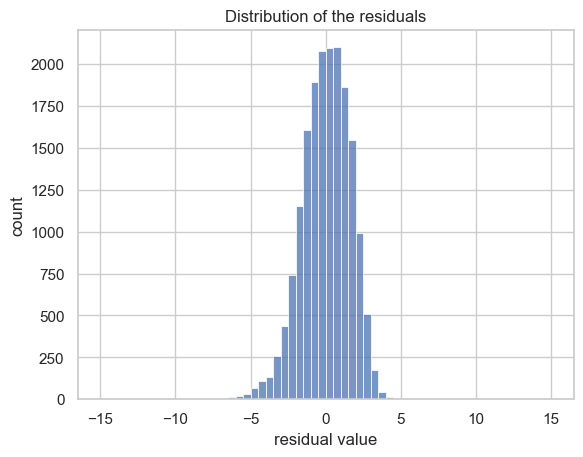

In [53]:
# Visualization of the distribution of the residuals
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

The residual graph shows the distribution of differences between targets and predictions. 
The residual graph forms a normal distribution; the estimates with residues near 0 have the highest frequency, though the highest frequency is not precisely on 0.

This fairly normally distributed graph validates the heteroscedasticity requisite to perform the linear regression.

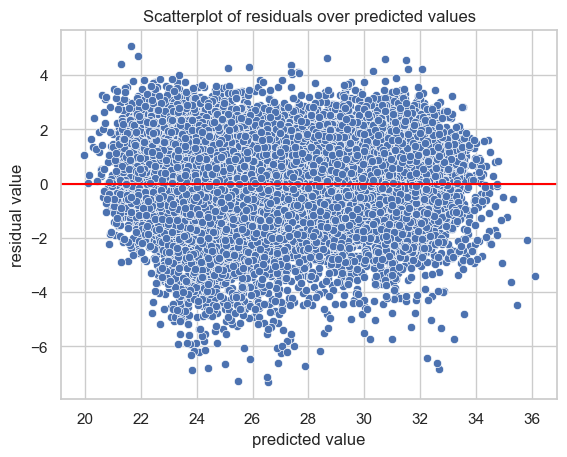

In [54]:
# Scatterplot of residuals over predicted

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption.

***Multicollinearity***

We check the multicollinearity using VIF (variance inflation factor).

In [55]:
# Estimation of the variance inflation factor.

# Importation of variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creation of a subset of the data with the continous independent variables. 
X = meteo_LVEG[['Air_pressure', 'Relative_Humidity', 'Wind_Direction', 'Wind_Speed']]

# Variance inflation factor for each variable estimation.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creation of a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# VIF results.
df_vif

,VIF
Air_pressure,81.401465
Relative_Humidity,49.548027
Wind_Direction,6.018775
Wind_Speed,8.789297


 =============================================================
 =============================================================

***Multiple linear regression***

We drop wind speed and Air_pressure variables for this regression analysis.


In [56]:
X = meteo_LVEG[['Relative_Humidity', 'Wind_Speed']]
y = meteo_LVEG[['Air_Temperature']]

In [57]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-1.9741211   1.55537492]
 [-0.90085161  1.56408426]
 [ 0.64865543 -0.4630894 ]
 ...
 [-2.69174856  1.37893573]
 [-0.29622606  0.67062624]
 [-0.35992282  0.2814089 ]]


In [59]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7466077824671213
R^2: 0.7466077824671213
MAE: 1.4180896694861236
MSE: 3.128070753777922
RMSE: 1.7686352800331453


In [61]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [62]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7518703991355901
R^2: 0.7518703991355901
MAE: 1.4154090754821171
MSE: 3.105311081634068
RMSE: 1.7621892865507007


In [63]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['Air_Temperature'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
83013,26.1717,23.900866,2.270834
6329,25.7342,25.297989,0.436211
18929,29.6354,30.108520,-0.473120
59023,30.4733,31.897912,-1.424612
35209,24.1475,24.493945,-0.346445


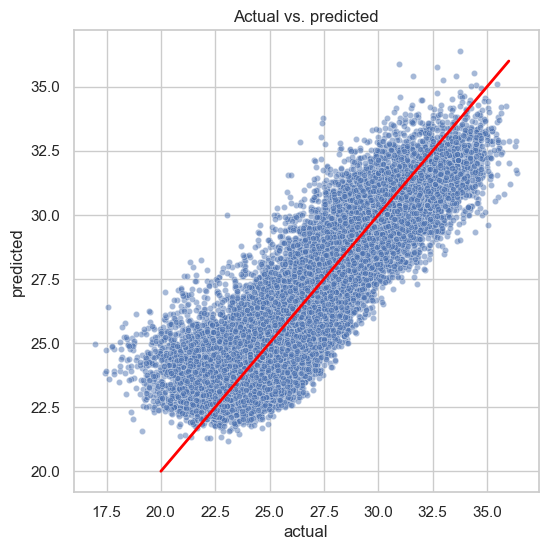

In [64]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([20,36], [20,36], c='red', linewidth=2)
plt.title('Actual vs. predicted');

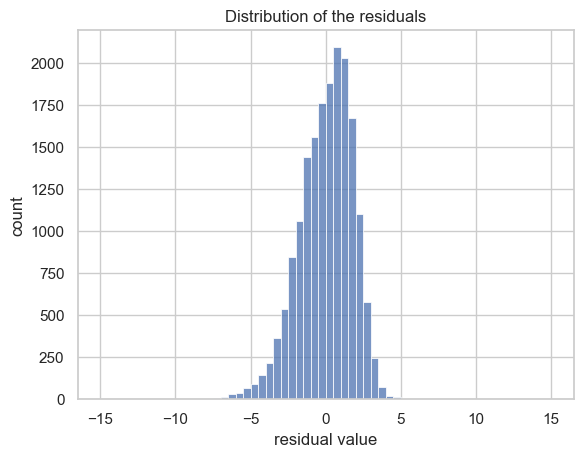

In [65]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

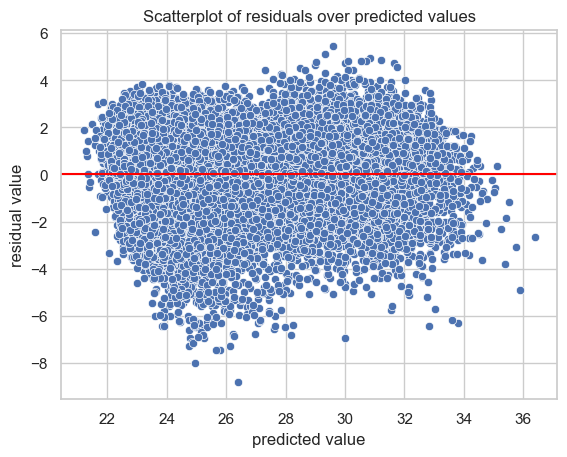

In [66]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

***Multicollinearity***

The variance inflation factor (VIF) was calculated for determining the multicollinearities. 

- If VIF=1, no intercorrelation exists between the independant variables; 

- If VIF stays within the range 1-5, the corresponding model is acceptable;

- If VIF > 10, the corresponding model is unstable (Famini et al, 1992)

In [67]:
# Estimation of the variance inflation factor.

# Importation of variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creation of a subset of the data with the continous independent variables. 
X = meteo_LVEG[['Relative_Humidity', 'Wind_Speed']]

# Variance inflation factor for each variable estimation.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Creation of a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# VIF results.
df_vif

,VIF
Relative_Humidity,2.520043
Wind_Speed,2.520043


In [68]:
lr.coef_

array([[-2.19345689,  1.05196714]])

In [69]:
lr.intercept_

array([26.59445086])

In [70]:
#display regression coefficients value of model
print(lr.intercept_, lr.coef_)

[26.59445086] [[-2.19345689  1.05196714]]


In [71]:
import statsmodels.api as sm

#define response variable
y = y_train

#define predictor variables
x = X_train_scaled

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Air_Temperature   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:59:10   Log-Likelihood:            -1.4234e+05
No. Observations:               71556   AIC:                         2.847e+05
Df Residuals:                   71553   BIC:                         2.847e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5945      0.007   4022.228      0.0